## Alignment to Atlantic cod genome

### Batch 8 (m3, r = 0.5, uncorrected) and Batch 4 (m10, r = 0.8, corrected)


I am going to align the final loci from these two batches to the *linkage groups* in the most recent Atlantic cod genome. 

<br>
**Genome**: gadMor2 (see [this notebook](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/New%20ACod%20%26%25Genome%26%25.ipynb))

**Software:** bowtie2, samtools v1.6, stacks v1.44, python 2.7

**Steps:**
1. Create fasta file using the final genepop for each batch + reference catalog of loci from `cstacks`
2. Create a database that only includes full linkage groups from gadMor2
3. Align fasta files to database
4. Generate presence / absence Manhattan plots)




<br>
<br>

#### 2/7/2018

### Make fasta file
#### Batch 4

In [2]:
cd ../scripts

/mnt/hgfs/PCod-Compare-repo/scripts


In [10]:
!python genBOWTIEfasta_from_matrix.py -h

usage: genBOWTIEfasta_from_matrix.py [-h] [-mat MATRIX] [-pos LOCI_POS]
                                     [-cat CATALOG] [-fasta FASTA_OUTPUT]
                                     [-p PATH]

create fasta file out of a 2x2 matrix with loci as column headers, individuals
as rows

optional arguments:
  -h, --help            show this help message and exit
  -mat MATRIX, --matrix MATRIX
                        filtered matrix file. Separation must be tab or comma
  -pos LOCI_POS, --loci-pos LOCI_POS
                        loci position in matrix. [rows/columns]
  -cat CATALOG, --catalog CATALOG
                        stacks batch.catalog.tags.tsv file
  -fasta FASTA_OUTPUT, --fasta_output FASTA_OUTPUT
                        output file, in fasta format
  -p PATH, --path PATH  path to stacks files, including matrix and catalog
                        input files


In [13]:
!python genBOWTIEfasta_from_matrix.py \
-mat batch_4_MB_filteredMAF_filteredLoci50_filteredIndivids_filteredHWE.txt \
-pos rows \
-cat batch_4.catalog.tags.tsv \
-fasta batch_4_filtered.fasta \
-p ../stacks_b4_wgenome

Reading loci from file:
batch_4_MB_filteredMAF_filteredLoci50_filteredIndivids_filteredHWE.txt
--
Discovered  3909  loci in matrix file.
--
Reading sequences from file:
batch_4.catalog.tags.tsv
Writing new fasta file...
Done.


In [15]:
!head ../stacks_b4_wgenome/batch_4_filtered.fasta

>2
TGCAGGGGCCGCAGTGTGTCAGCTGACATGTTGGAGGAAGATGTCTGCTTAGAGAGGAAGATCTGGGGACGTGTATGTGTGTGCGTGTGTCT
>3
TGCAGGACCCCCAGACATCCAGTGTTGTACTGGAGTATTTCAGGAGATCAGATGCTCGCACTCTAAGCCAACTAATGTCGACCCCTATGGCC
>6
TGCAGGACTAAAAATCCACCAGGCCTGTGGAGTTCAGACGATAGAAAAAGACTTTCCACTGTGGCCACCGTCCTGCTTCACTGTTGGCTTGG
>11
TGCAGGAGGGAGGGTCTGTGCACACGTGGGGAAACATGTGACGCGTGTTTATGAGCATGCAGAGCTGATGGATGGATGGATCTGGGCTCAGC
>14
TGCAGGCCAGACGCCGCCCCACCTCCACAGCGAGAAACACTAAGCTAACCCTAACAATAAAATAAAGCAAATACATTGGAGGTAGTAGTATT


#### Batch 8, m3

In [17]:
!python genBOWTIEfasta_from_matrix.py \
-mat batch_8_filteredMAF_filteredLoci30_filteredIndivids_filteredHWE.txt \
-pos rows \
-cat batch_8.catalog.tags.tsv \
-fasta batch_8_m3_filtered.fasta \
-p ../stacks_b8_wgenome_r05

Reading loci from file:
batch_8_filteredMAF_filteredLoci30_filteredIndivids_filteredHWE.txt
--
Discovered  5682  loci in matrix file.
--
Reading sequences from file:
batch_8.catalog.tags.tsv
Writing new fasta file...
Done.


In [18]:
!head ../stacks_b8_wgenome_r05/batch_8_m3_filtered.fasta

>3
TGCAGGACCCCCAGACATCCAGTGTTGTACTGGAGTATTTCAGGAGATCAGATGCTCGCACTCTAAGCCAACTAATGTCGACCCCTATGGCC
>5
TGCAGGCGTGCTCTCTCCTTCCCTCTTGGTCTTGGCACTGACCAGTCTCTCGTTGATGACCTTCACCTTCTCCGTGGCCTCCGCCAGCTTAA
>6
TGCAGGACTAAAAATCCACCAGGCCTGTGGAGTTCAGACGATAGAAAAAGACTTTCCACTGTGGCCACCGTCCTGCTTCACTGTTGGCTTGG
>11
TGCAGGAGGGAGGGTCTGTGCACACGTGGGGAAACATGTGACGCGTGTTTATGAGCATGCAGAGCTGATGGATGGATGGATCTGGGCTCAGC
>16
TGCAGGACAGAGCCCCATCTAAGCATATTCCTCGTTTTAAATAGTCTCCTCACCCTGTCATGCACTCCCCCCTTTGCTCTCAGGGGATTATT


<br>
<br>
### Build bowtie2 database
While I have a bowtie2 database for the full gadMor2 genome, I only want to align to linkage groups. 

I built the database using an abbreviated gadMor2 fasta file created in [this notebook](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/gadMor2%20Genome.ipynb).

In [20]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [21]:
!bowtie2-build ACod_reference/gadMor2_LG.fasta ACod_reference/gadMor2_LG

Settings:
  Output files: "ACod_reference/gadMor2_LG.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ACod_reference/gadMor2_LG.fasta
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:07
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:03
bmax according to bmaxDivN setting: 147488545
Using parameters --bmax 110616409 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 110616409

  10%
  20%
  30%
  40%
  50%
  60%
  70%
  80%
  90%
  100%
  Binary sorting into buckets time: 00:00:14
Splitting and merging
  Splitting and merging time: 00:00:00
Avg bucket size: 8.42792e+07 (target: 110616408)
Converting suffix-array elements to index image
Allocating ftab, absorbFtab
Entering Ebwt loop
Getting block 1 of 7
  Reserving size (110616409) for bucket
  Calculating Z arrays
  Calculating Z arrays time: 00:00:00
  Entering block accumulator loop:
  10%
  20%
  30%
  40%
  50%
  60%
  70%
  80%
  90%
  100%
  Block accumulator loop time: 00:00:04
  Sorting block of length 90228323
  (Using difference cover)
  Sorting block time: 00:00:54
Returning block of 90228324
Getting block 2 of 7
  Reserving size (110616409) for bucket
  Calculating Z arrays
  Calculating Z arrays time: 00:00:00
  Entering block accumulator loop:
  10%
  20%
  30%
  40%
  50%
  60%
  70%
  80%
  90%
  100%
  Block accumulator loop time: 00:00:05
  Sorting block of length 55681498
  (Using differen

<br>
<br>

### Align to gadMor2_LG

I want to use BOWTIE2 to align ONLY to the full linkage groups from the new Atlantic cod genome.

#### Batch 4

In [1]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [2]:
!bowtie2 -f \
-x ACod_reference/gadMor2_LG \
-U stacks_b4_wgenome/batch_4_filtered.fasta \
-S stacks_b4_wgenome/batch_4_filtered_gadMor2LG.sam

3909 reads; of these:
  3909 (100.00%) were unpaired; of these:
    433 (11.08%) aligned 0 times
    3181 (81.38%) aligned exactly 1 time
    295 (7.55%) aligned >1 times
88.92% overall alignment rate


In [3]:
!tail -n 2 stacks_b4_wgenome/batch_4_filtered_gadMor2LG.sam

25667	4	*	0	0	*	*	0	0	TGCAGGGTAAACATACAGCTACTCAGACAAACAACAAGCACGAGCGAAAAAAGGGTAAAAGGAATGGGGGCAGAGGCCTACAAAGTTGGAAA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	YT:Z:UU
25681	4	*	0	0	*	*	0	0	TGCAGGTATGGGGCTTGTAAATCGTGATCTCACATCGCCATGACAGCAGCCATTTTGAAATAATATGAAGGGAGACTGTAGTTGTGTTTAAA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	YT:Z:UU


#### Batch 8

In [24]:
!bowtie2 -f \
-x ACod_reference/gadMor2_LG \
-U stacks_b8_wgenome_r05/batch_8_m3_filtered.fasta \
-S stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG.sam

5682 reads; of these:
  5682 (100.00%) were unpaired; of these:
    596 (10.49%) aligned 0 times
    4683 (82.42%) aligned exactly 1 time
    403 (7.09%) aligned >1 times
89.51% overall alignment rate


In [27]:
!tail -n 2 stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG.sam

25667	4	*	0	0	*	*	0	0	TGCAGGGTAAACATACAGCTACTCAGACAAACAACAAGCACGAGCGAAAAAAGGGTAAAAGGAATGGGGGCAGAGGCCTACAAAGTTGGAAA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	YT:Z:UU
25678	4	*	0	0	*	*	0	0	TGCAGGTACCTGACCCCCCCCGTTGCTCAGGGGGTTTTCGCAGGTCAGCCCGGGACGGGGATTTAGTCCCTCTCCTTAGCCGGCCGTGATGG	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	YT:Z:UU


<br>
<br>

### Filter Alignment Quality -- MQ > 10

#### Mapping Quality Score Distribution

In [30]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG.sam", "r")
line = infile.readline()
while line.startswith("@"):
    line = infile.readline()
    
map_scores = []
for line in infile:
    score = line.strip().split()[4]
    map_scores.append(int(score))
infile.close()

In [31]:
import matplotlib.pyplot as plt
import numpy as np

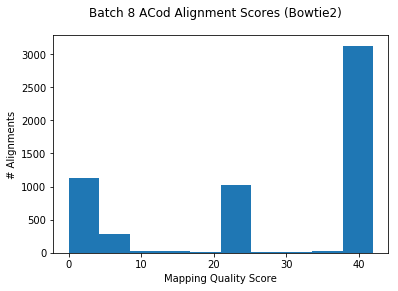

In [35]:
plt.hist(map_scores)
plt.suptitle("Batch 8 ACod Alignment Scores (Bowtie2)")
plt.xlabel("Mapping Quality Score")
plt.ylabel("# Alignments")
plt.show()

In [36]:
plt.close()

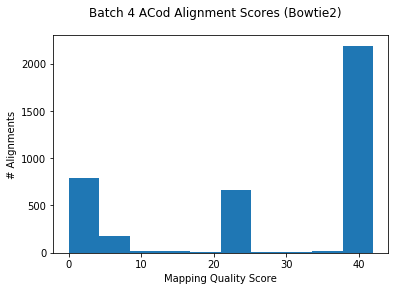

In [38]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG.sam", "r")
line = infile.readline()
while line.startswith("@"):
    line = infile.readline()
    
map_scores = []
for line in infile:
    score = line.strip().split()[4]
    map_scores.append(int(score))
infile.close()


plt.hist(map_scores)
plt.suptitle("Batch 4 ACod Alignment Scores (Bowtie2)")
plt.xlabel("Mapping Quality Score")
plt.ylabel("# Alignments")
plt.show()

In [39]:
plt.close()

#### Quality Score Filtering: Cutoff of 10

In [40]:
!samtools view -Sq 10 stacks_b4_wgenome/batch_4_filtered_gadMor2LG.sam \
>> stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered.sam

In [42]:
!samtools view -Sq 10 stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG.sam \
>> stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered.sam

*Note that using `samtools` in this way removes the header from the file!*

In [43]:
!head stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered.sam

3	16	LG21	18027708	42	92M	*	0	0	GGCCATAGGGGTCGACATTAGTTGGCTTAGAGTGCGAGCATCTGATCTCCTGAAATACTCCAGTACAACACTGGATGTCTGGGGGTCCTGCA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:-6	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:28T63	YT:Z:UU
5	0	LG11	27261814	24	92M	*	0	0	TGCAGGCGTGCTCTCTCCTTCCCTCTTGGTCTTGGCACTGACCAGTCTCTCGTTGATGACCTTCACCTTCTCCGTGGCCTCCGCCAGCTTAA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:-18	XN:i:0	XM:i:3	XO:i:0	XG:i:0	NM:i:3	MD:Z:36G35T17C1	YT:Z:UU
6	0	LG10	5565406	42	92M	*	0	0	TGCAGGACTAAAAATCCACCAGGCCTGTGGAGTTCAGACGATAGAAAAAGACTTTCCACTGTGGCCACCGTCCTGCTTCACTGTTGGCTTGG	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:92	YT:Z:UU
11	16	LG10	22879220	24	92M	*	0	0	GCTGAGCCCAGATCCATCCATCCATCAGCTCTGCATGCTCATAAACACGCGTCACATGTTTCCCCACGTGTGCACAGACCCTCCCTCCTGCA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

#### Distribution of Alignment Scores of retained loci 

#### Batch 4

In [13]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered.sam", "r")
as_dict = {}
for line in infile:
    new_as = line.strip().split()[11].split(":")[2]
    locus = line.strip().split()[0]
    if locus not in as_dict.keys():
        as_dict[locus] = new_as
    else: 
        print "Error! You have retained multiple alignments for locus: " + locus
infile.close()

as_list = [int(as_dict[i]) for i in as_dict.keys()]

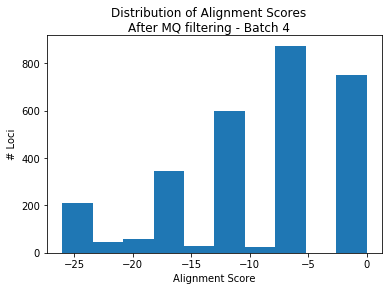

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(as_list)
plt.suptitle("Distribution of Alignment Scores\nAfter MQ filtering - Batch 4")
plt.xlabel("Alignment Score")
plt.ylabel("# Loci")
plt.show()

In [15]:
plt.close()

#### Batch 8 

In [16]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered.sam", "r")
as_dict_8 = {}
for line in infile:
    new_as = line.strip().split()[11].split(":")[2]
    locus = line.strip().split()[0]
    if locus not in as_dict_8.keys():
        as_dict_8[locus] = new_as
    else: 
        print "Error! You have retained multiple alignments for locus: " + locus
infile.close()

as_list_8 = [int(as_dict_8[i]) for i in as_dict_8.keys()]

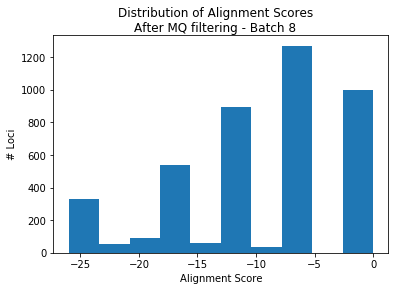

In [17]:
plt.hist(as_list_8)
plt.suptitle("Distribution of Alignment Scores\nAfter MQ filtering - Batch 8")
plt.xlabel("Alignment Score")
plt.ylabel("# Loci")
plt.show()

In [18]:
plt.close()


#### How many alignments to each linkage group?
#### Batch 4

In [54]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered.sam", "r")
lg_dict = {}
for line in infile:
    lg = line.strip().split()[2]
    if lg in lg_dict.keys():
        count = lg_dict[lg]
        count += 1
        lg_dict[lg] = count
    elif lg not in lg_dict.keys():
        lg_dict[lg] = 1
infile.close()

lg_counts = []
for i in lg_dict.keys():
    lg_counts.append(lg_dict[i])

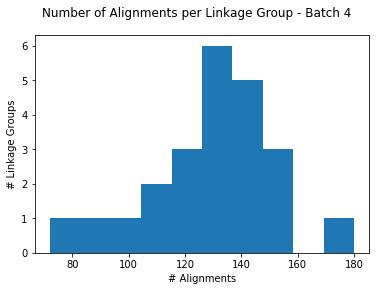

In [55]:
plt.hist(lg_counts)
plt.suptitle("Number of Alignments per Linkage Group - Batch 4")
plt.xlabel("# Alignments")
plt.ylabel("# Linkage Groups")
plt.show()

In [56]:
plt.close()

#### Batch 8

In [51]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered.sam", "r")
lg_dict = {}
for line in infile:
    lg = line.strip().split()[2]
    if lg in lg_dict.keys():
        count = lg_dict[lg]
        count += 1
        lg_dict[lg] = count
    elif lg not in lg_dict.keys():
        lg_dict[lg] = 1
infile.close()

lg_counts = []
for i in lg_dict.keys():
    lg_counts.append(lg_dict[i])

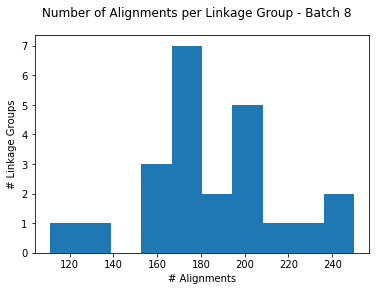

In [52]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(lg_counts)
plt.suptitle("Number of Alignments per Linkage Group - Batch 8")
plt.xlabel("# Alignments")
plt.ylabel("# Linkage Groups")
plt.show()

In [53]:
plt.close()

#### 2/8/2018
<br>
<br>
### Filter for Mapping Quality -- MQ > 20

In [6]:
!samtools view -Sq 20 stacks_b4_wgenome/batch_4_filtered_gadMor2LG.sam \
>> stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20.sam

In [20]:
!samtools view -Sq 20 stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG.sam \
>> stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20.sam

#### Distribution of Alignment Scores of retained loci 

#### Batch 4

In [7]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20.sam", "r")
as_dict = {}
for line in infile:
    new_as = line.strip().split()[11].split(":")[2]
    locus = line.strip().split()[0]
    if locus not in as_dict.keys():
        as_dict[locus] = new_as
    else: 
        print "Error! You have retained multiple alignments for locus: " + locus
infile.close()

as_list = [int(as_dict[i]) for i in as_dict.keys()]

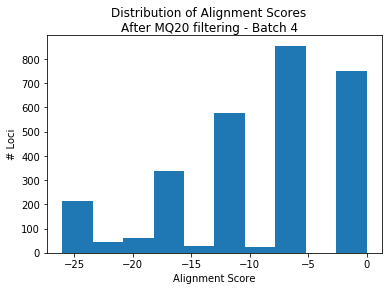

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(as_list)
plt.suptitle("Distribution of Alignment Scores\nAfter MQ20 filtering - Batch 4")
plt.xlabel("Alignment Score")
plt.ylabel("# Loci")
plt.show()

In [9]:
plt.close()

#### Batch 8 

In [24]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20.sam", "r")
as_dict_8 = {}
for line in infile:
    new_as = line.strip().split()[11].split(":")[2]
    locus = line.strip().split()[0]
    if locus not in as_dict_8.keys():
        as_dict_8[locus] = new_as
    else: 
        print "Error! You have retained multiple alignments for locus: " + locus
infile.close()

as_list_8 = [int(as_dict_8[i]) for i in as_dict_8.keys()]

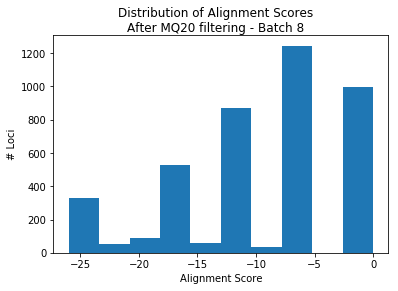

In [25]:
plt.hist(as_list_8)
plt.suptitle("Distribution of Alignment Scores\nAfter MQ20 filtering - Batch 8")
plt.xlabel("Alignment Score")
plt.ylabel("# Loci")
plt.show()

In [26]:
plt.close()


#### How many alignments to each linkage group?
#### Batch 4

In [27]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20.sam", "r")
lg_dict = {}
for line in infile:
    lg = line.strip().split()[2]
    if lg in lg_dict.keys():
        count = lg_dict[lg]
        count += 1
        lg_dict[lg] = count
    elif lg not in lg_dict.keys():
        lg_dict[lg] = 1
infile.close()

lg_counts = []
for i in lg_dict.keys():
    lg_counts.append(lg_dict[i])

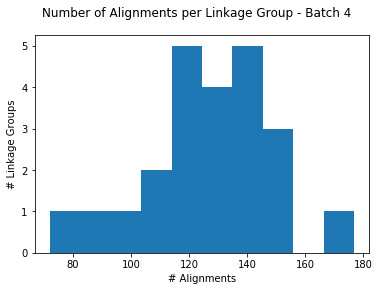

In [28]:
plt.hist(lg_counts)
plt.suptitle("Number of Alignments per Linkage Group - Batch 4")
plt.xlabel("# Alignments")
plt.ylabel("# Linkage Groups")
plt.show()

In [29]:
plt.close()

#### Batch 8

In [30]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20.sam", "r")
lg_dict = {}
for line in infile:
    lg = line.strip().split()[2]
    if lg in lg_dict.keys():
        count = lg_dict[lg]
        count += 1
        lg_dict[lg] = count
    elif lg not in lg_dict.keys():
        lg_dict[lg] = 1
infile.close()

lg_counts = []
for i in lg_dict.keys():
    lg_counts.append(lg_dict[i])

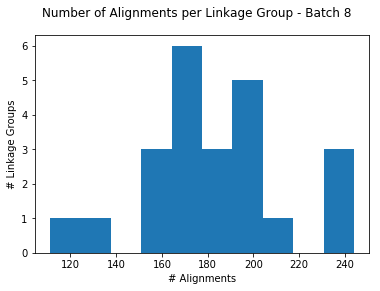

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(lg_counts)
plt.suptitle("Number of Alignments per Linkage Group - Batch 8")
plt.xlabel("# Alignments")
plt.ylabel("# Linkage Groups")
plt.show()

In [32]:
plt.close()

<br>
<br>

### Looking more closely at Alignment Scores

When filtering Bowtie2 output, it is common to filter by mapping quality. But what about alignment score? From above, it looks like even though I'm filtering for MQ > 20, I'm still getting low alignment scores (down to -25!). 

#### What is the mapping quality of the alignments with AS-25? Using Batch 8


In [38]:
!grep -e "AS:i:-25" -e "AS:i:-24" -e "AS:i:-23" -e "AS:i:-22" -e "AS:i:-21" -e "AS:i:-20" stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20.sam >> stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20_AS-25.sam

In [39]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20_AS-25.sam", "r")
map_scores = []
for line in infile:
    score = line.strip().split()[4]
    map_scores.append(int(score))
infile.close()

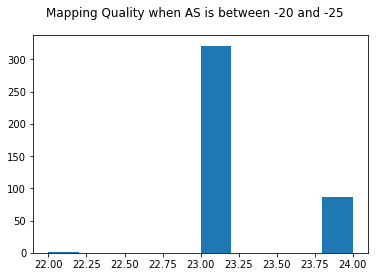

In [41]:
plt.hist(map_scores)
plt.suptitle("Mapping Quality when AS is between -20 and -25")
plt.show()

In [42]:
plt.close()

<br>
<br>
### Filtering by Alignment Score (AS > -20)

#### Batch 4

In [10]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20.sam", "r")
outfile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20_filteredAS.sam", "w")
badfile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20_badAS.sam", "w")
count = 0
for line in infile:
    ascore = int(line.strip().split()[11].split(":")[2])
    if ascore > -20:
        outfile.write(line)
        count += 1
    else:
        badfile.write(line)
infile.close()
outfile.close()
badfile.close()

print "Final number of loci: ", count

Final number of loci:  2582


In [45]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20.sam", "r")
outfile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20_filteredAS.sam", "w")
badfile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20_badAS.sam", "w")
count = 0
for line in infile:
    ascore = int(line.strip().split()[11].split(":")[2])
    if ascore > -20:
        outfile.write(line)
        count += 1
    else:
        badfile.write(line)
infile.close()
outfile.close()
badfile.close()

print "Final number of loci: ", count

Final number of loci:  3742
